In [ ]:
import zipfile
import os


zip_path = '/content/Researchdata.zip.zip'
extract_path = '/content/dataset'


os.makedirs(extract_path, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


extracted_files = os.listdir(extract_path)
extracted_files


['Dataset_BUSI_with_GT']

In [ ]:
import hashlib

def file_hash(filepath):

    with open(filepath, 'rb') as f:
        return hashlib.sha256(f.read()).hexdigest()

def remove_duplicates(folder_path):

    hashes = {}
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        if os.path.isfile(filepath):
            hash_value = file_hash(filepath)
            if hash_value in hashes:
                os.remove(filepath)
                print(f" Removed duplicate: {filepath}")
            else:
                hashes[hash_value] = filename

def remove_masks(folder_path):

    for filename in os.listdir(folder_path):
        if '_mask' in filename.lower():
            filepath = os.path.join(folder_path, filename)
            os.remove(filepath)
            print(f" Removed mask file: {filepath}")


benign_path = '/content/dataset/Dataset_BUSI_with_GT/benign'
malignant_path = '/content/dataset/Dataset_BUSI_with_GT/malignant'
normal_path = '/content/dataset/Dataset_BUSI_with_GT/normal'


for path in [benign_path, malignant_path, normal_path]:
    remove_duplicates(path)
    remove_masks(path)

print("Duplicate and Mask Removal Done.")


Duplicate and Mask Removal Done.


Class Distribution:
benign: 437 images
malignant: 210 images
normal: 133 images


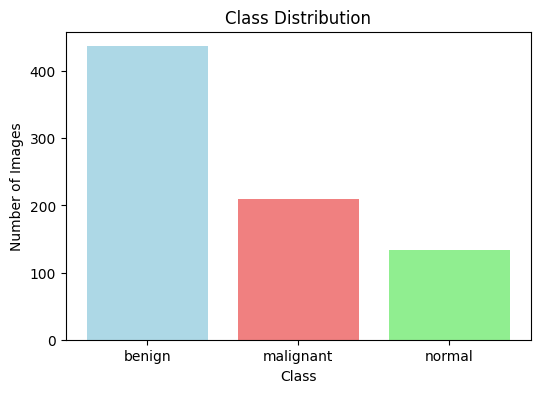

In [ ]:
import collections
import matplotlib.pyplot as plt


classes = ['benign', 'malignant', 'normal']
X = []
y = []

for label in classes:
    folder_path = os.path.join('/content/dataset/Dataset_BUSI_with_GT', label)
    for img_name in os.listdir(folder_path):
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            X.append(os.path.join(folder_path, img_name))
            y.append(label)


class_counts = collections.Counter(y)
print("Class Distribution:")
for label, count in class_counts.items():
    print(f"{label}: {count} images")


plt.figure(figsize=(6,4))
plt.bar(class_counts.keys(), class_counts.values(), color=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


In [ ]:
import os

# cleaned dataset path
dataset_path = '/content/dataset/Dataset_BUSI_with_GT'
classes = ['benign', 'malignant', 'normal']

# Count images
def count_images(folder):
    valid_images = [img for img in os.listdir(folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    return len(valid_images)

# Check counts
print(" Number of images per class (after mask and duplicate removal):\n")
for cls in classes:
    folder_path = os.path.join(dataset_path, cls)
    num_images = count_images(folder_path)
    print(f"- {cls}: {num_images} images")




 Number of images per class (after mask and duplicate removal):

- benign: 437 images
- malignant: 210 images
- normal: 133 images


In [ ]:
import os
import shutil
import random

# Paths
dataset_path = '/content/dataset/Dataset_BUSI_with_GT'
classes = ['benign', 'malignant', 'normal']

# Target
target_per_class = 133

# Create new clean dataset folder
output_path = '/content/cleaned_balanced_dataset'
os.makedirs(output_path, exist_ok=True)

# For each class
for cls in classes:
    class_input_path = os.path.join(dataset_path, cls)
    class_output_path = os.path.join(output_path, cls)
    os.makedirs(class_output_path, exist_ok=True)

    # Get all valid images
    images = [img for img in os.listdir(class_input_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Shuffle and select 133
    random.seed(42)
    selected_images = random.sample(images, target_per_class)

    # Copy selected images
    for img_name in selected_images:
        src = os.path.join(class_input_path, img_name)
        dst = os.path.join(class_output_path, img_name)
        shutil.copy(src, dst)

    print(f" {cls}: {len(selected_images)} images selected.")

print("\n Finished creating cleaned balanced dataset!")


 benign: 133 images selected.
 malignant: 133 images selected.
 normal: 133 images selected.

 Finished creating cleaned balanced dataset!


In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Path
data_path = '/content/cleaned_balanced_dataset'
classes = ['benign', 'malignant', 'normal']
image_size = (224, 224)  # or (128, 128)

# Load & Process
X = []
y = []

for label in classes:
    class_path = os.path.join(data_path, label)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, image_size)
        img = img / 255.0  # normalize
        X.append(img)
        y.append(label)

X = np.array(X)
X = X[..., np.newaxis]  # shape = (N, H, W, 1)
y = np.array(y)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(" Image shape:", X.shape)
print(" Labels shape:", y_encoded.shape)
print(" Classes:", list(le.classes_))


 Image shape: (399, 224, 224, 1)
 Labels shape: (399,)
 Classes: [np.str_('benign'), np.str_('malignant'), np.str_('normal')]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Train images: {len(X_train)}, Test images: {len(X_test)}")


Train images: 319, Test images: 80


GLCM+RESNET18

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_184']
Received: inputs=Tensor(shape=(16, 224, 224, 3))
  warnings.warn(msg)


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_184']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.6124 - loss: 1.1636 - val_accuracy: 0.6562 - val_loss: 1.4030
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.8741 - loss: 0.3485 - val_accuracy: 0.7812 - val_loss: 1.3367
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9576 - loss: 0.1503 - val_accuracy: 0.8125 - val_loss: 1.2477
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9814 - loss: 0.0700 - val_accuracy: 0.7812 - val_loss: 1.1764
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9764 - loss: 0.0698 - val_accuracy: 0.7812 - val_loss: 1.1712
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9943 - loss: 0.0268 - val_accuracy: 0.7812 - val_loss: 1.1518
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9975 - loss: 0.0255 - val_accuracy: 0.7812 - val_loss: 1.1359
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.9916 - loss: 0.0328 - val_accuracy: 0.7812 

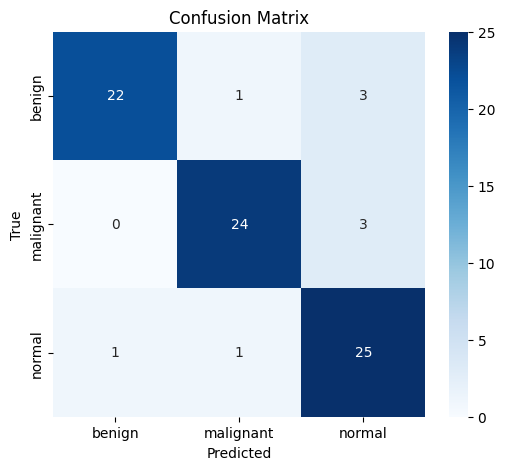

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


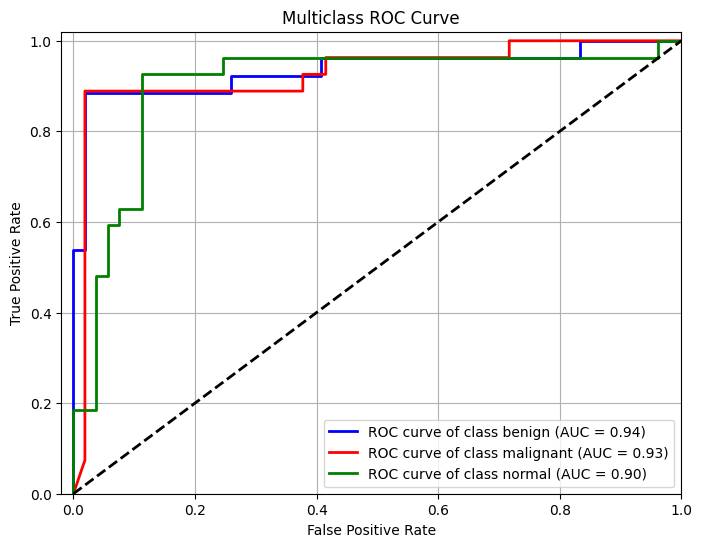

In [ ]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
SEED = 42
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Load grayscale images
def load_data(path, classes, max_per_class=133, img_size=(224, 224)):
    X, y = [], []
    for label in classes:
        folder = os.path.join(path, label)
        files = os.listdir(folder)[:max_per_class]
        for f in files:
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img / 255.0
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

# GLCM feature extractor
def extract_glcm(img):
    img_uint8 = (img * 255).astype('uint8')
    glcm = graycomatrix(img_uint8, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    features = [
        graycoprops(glcm, 'contrast')[0, 0],
        graycoprops(glcm, 'dissimilarity')[0, 0],
        graycoprops(glcm, 'homogeneity')[0, 0],
        graycoprops(glcm, 'energy')[0, 0],
        graycoprops(glcm, 'correlation')[0, 0],
        graycoprops(glcm, 'ASM')[0, 0],
    ]
    return np.array(features)

def extract_glcm_features(images):
    return np.array([extract_glcm(img) for img in images])

# Convert grayscale to RGB and preprocess for ResNet
def prepare_rgb(batch):
    rgb_imgs = []
    for img in batch:
        img_rgb = cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
        img_rgb = cv2.resize(img_rgb, (224, 224))
        rgb_imgs.append(img_rgb)
    rgb_imgs = np.array(rgb_imgs)
    return preprocess_input(rgb_imgs)



# Dataset
dataset_path = '/content/dataset/Dataset_BUSI_with_GT'
classes = ['benign', 'malignant', 'normal']

# Load data
X, y = load_data(dataset_path, classes)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=SEED)

# Extract GLCM
glcm_train = extract_glcm_features(X_train)
glcm_test = extract_glcm_features(X_test)

# Prepare for ResNet
X_train_rgb = prepare_rgb(X_train)
X_test_rgb = prepare_rgb(X_test)

# Truncated ResNet50 (ResNet18-like) feature extractor
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in base_model.layers[:-20]:
    layer.trainable = False

x = Flatten()(base_model.output)
resnet_model = Model(inputs=base_model.input, outputs=x)

resnet_train = resnet_model.predict(X_train_rgb, batch_size=16, verbose=1)
resnet_test = resnet_model.predict(X_test_rgb, batch_size=16, verbose=1)

# Combine features
X_train_combined = np.concatenate([resnet_train, glcm_train], axis=1)
X_test_combined = np.concatenate([resnet_test, glcm_test], axis=1)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

#  MLP Classifier
model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop]
)

# Evaluation
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = model.predict(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {le.classes_[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


LBP+RESNET18

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_184']
Received: inputs=Tensor(shape=(16, 224, 224, 3))
  warnings.warn(msg)


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_184']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.6140 - loss: 1.1502 - val_accuracy: 0.6875 - val_loss: 1.5120
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8830 - loss: 0.2648 - val_accuracy: 0.7500 - val_loss: 1.5162
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9537 - loss: 0.1488 - val_accuracy: 0.7812 - val_loss: 1.3480
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9831 - loss: 0.0774 - val_accuracy: 0.7188 - val_loss: 1.2485
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9706 - loss: 0.0951 - val_accuracy: 0.7188 - val_loss: 1.2300
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9922 - loss: 0.0376 - val_accuracy: 0.7500 - val_loss: 1.2296
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9964 - loss: 0.0294 - val_accuracy: 0.7500 - val_loss: 1.2038
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9916 - loss: 0.0325 - val_accuracy: 0.7500 -

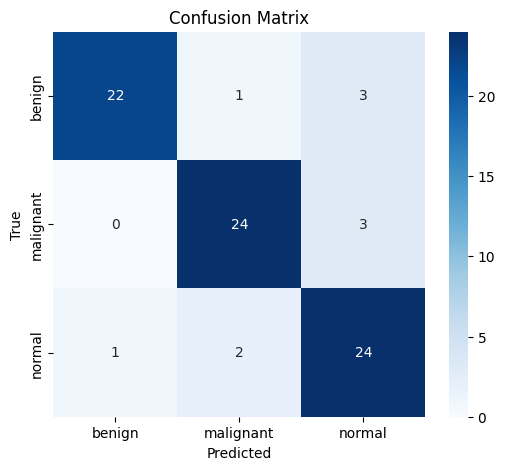

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


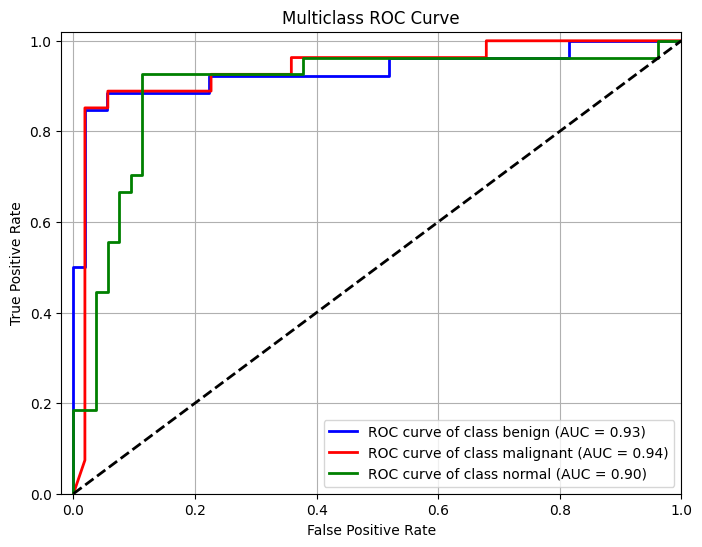

In [ ]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from itertools import cycle

from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
SEED = 42
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Load grayscale images
def load_data(path, classes, max_per_class=133, img_size=(224, 224)):
    X, y = [], []
    for label in classes:
        folder = os.path.join(path, label)
        files = os.listdir(folder)[:max_per_class]
        for f in files:
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img / 255.0
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

# LBP feature extractor
def extract_lbp_features(images):
    lbp_features = []
    for img in images:
        lbp = local_binary_pattern((img * 255).astype('uint8'), P=8, R=1, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-6)
        lbp_features.append(hist)
    return np.array(lbp_features)

# Convert grayscale to RGB and preprocess for ResNet
def prepare_rgb(batch):
    rgb_imgs = []
    for img in batch:
        img_rgb = cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
        img_rgb = cv2.resize(img_rgb, (224, 224))
        rgb_imgs.append(img_rgb)
    rgb_imgs = np.array(rgb_imgs)
    return preprocess_input(rgb_imgs)



dataset_path = '/content/dataset/Dataset_BUSI_with_GT'
classes = ['benign', 'malignant', 'normal']

# Load data
X, y = load_data(dataset_path, classes)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=SEED)

# Extract LBP
lbp_train = extract_lbp_features(X_train)
lbp_test = extract_lbp_features(X_test)

# Prepare for ResNet
X_train_rgb = prepare_rgb(X_train)
X_test_rgb = prepare_rgb(X_test)

# Truncated ResNet50 (ResNet18-like) feature extractor
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in base_model.layers[:-20]:
    layer.trainable = False

x = Flatten()(base_model.output)
resnet_model = Model(inputs=base_model.input, outputs=x)

resnet_train = resnet_model.predict(X_train_rgb, batch_size=16, verbose=1)
resnet_test = resnet_model.predict(X_test_rgb, batch_size=16, verbose=1)

# Combine features
X_train_combined = np.concatenate([resnet_train, lbp_train], axis=1)
X_test_combined = np.concatenate([resnet_test, lbp_test], axis=1)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)


model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop]
)

# Evaluate
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

print(" ✅Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
n_classes = len(classes)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = model.predict(X_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {le.classes_[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


INTENSITY+RESNET18

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_552']
Received: inputs=Tensor(shape=(16, 224, 224, 3))
  warnings.warn(msg)


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_552']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.5998 - loss: 1.1478 - val_accuracy: 0.6562 - val_loss: 1.4258
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.8998 - loss: 0.2572 - val_accuracy: 0.7500 - val_loss: 1.3877
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9552 - loss: 0.1158 - val_accuracy: 0.7188 - val_loss: 1.3011
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9839 - loss: 0.0697 - val_accuracy: 0.7188 - val_loss: 1.2260
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9841 - loss: 0.0568 - val_accuracy: 0.7188 - val_loss: 1.2002
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9982 - loss: 0.0294 - val_accuracy: 0.7188 - val_loss: 1.1816
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9988 - loss: 0.0256 - val_accuracy: 0.7188 - val_loss: 1.1685
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9916 - loss: 0.0198 - val_accuracy: 0.7188 -

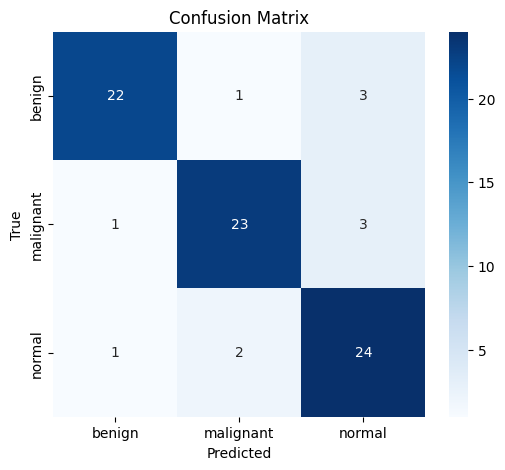

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


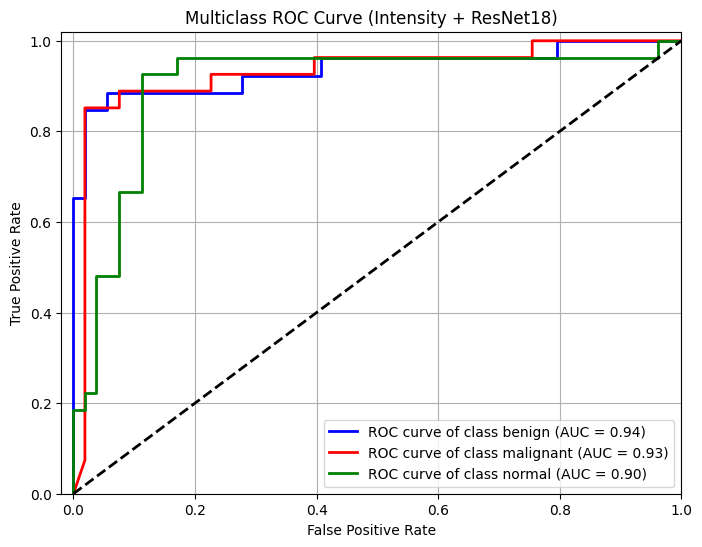

In [ ]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from itertools import cycle

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
SEED = 42
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Load grayscale images
def load_data(path, classes, max_per_class=133, img_size=(224, 224)):
    X, y = [], []
    for label in classes:
        folder = os.path.join(path, label)
        files = os.listdir(folder)[:max_per_class]
        for f in files:
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img / 255.0
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

# Intensity feature extractor
def extract_intensity_features(images):
    return np.array([[np.mean(img), np.std(img)] for img in images])

# Convert grayscale to RGB and preprocess for ResNet
def prepare_rgb(batch):
    rgb_imgs = []
    for img in batch:
        img_rgb = cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
        img_rgb = cv2.resize(img_rgb, (224, 224))
        rgb_imgs.append(img_rgb)
    rgb_imgs = np.array(rgb_imgs)
    return preprocess_input(rgb_imgs)



# Dataset
dataset_path = '/content/dataset/Dataset_BUSI_with_GT'
classes = ['benign', 'malignant', 'normal']

# Load data
X, y = load_data(dataset_path, classes)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=SEED)

# Extract Intensity Features
intensity_train = extract_intensity_features(X_train)
intensity_test = extract_intensity_features(X_test)

# Prepare for ResNet
X_train_rgb = prepare_rgb(X_train)
X_test_rgb = prepare_rgb(X_test)

# Truncated ResNet50 used as ResNet18-like feature extractor
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in base_model.layers[:-20]:
    layer.trainable = False

x = Flatten()(base_model.output)
resnet_model = Model(inputs=base_model.input, outputs=x)

resnet_train = resnet_model.predict(X_train_rgb, batch_size=16, verbose=1)
resnet_test = resnet_model.predict(X_test_rgb, batch_size=16, verbose=1)

# Combine features: ResNet + Intensity
X_train_combined = np.concatenate([resnet_train, intensity_train], axis=1)
X_test_combined = np.concatenate([resnet_test, intensity_test], axis=1)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)


model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop]
)

# Evaluation
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = model.predict(X_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {le.classes_[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Intensity + ResNet18)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


GLCM+LBP+INTENSITY+RESNET18

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_736']
Received: inputs=Tensor(shape=(16, 224, 224, 3))
  warnings.warn(msg)


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_736']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.5859 - loss: 1.1364 - val_accuracy: 0.6875 - val_loss: 1.4382
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9032 - loss: 0.2936 - val_accuracy: 0.7500 - val_loss: 1.4039
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9616 - loss: 0.1437 - val_accuracy: 0.7812 - val_loss: 1.2943
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9794 - loss: 0.0601 - val_accuracy: 0.7812 - val_loss: 1.2405
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9809 - loss: 0.0654 - val_accuracy: 0.7812 - val_loss: 1.1824
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9932 - loss: 0.0311 - val_accuracy: 0.7812 - val_loss: 1.1412
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.9930 - loss: 0.0347 - val_accuracy: 0.7812 - val_loss: 1.1250
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9908 - loss: 0.0431 - val_accuracy: 0.7812 -

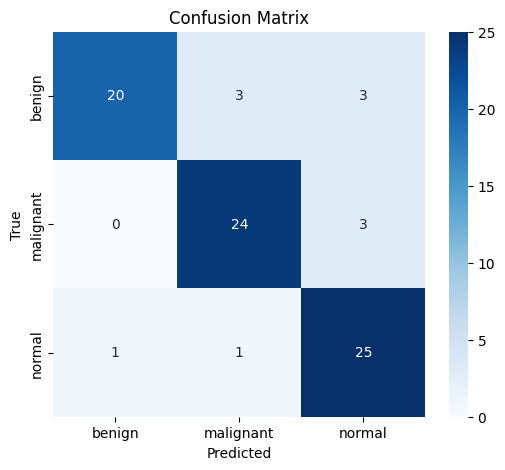

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


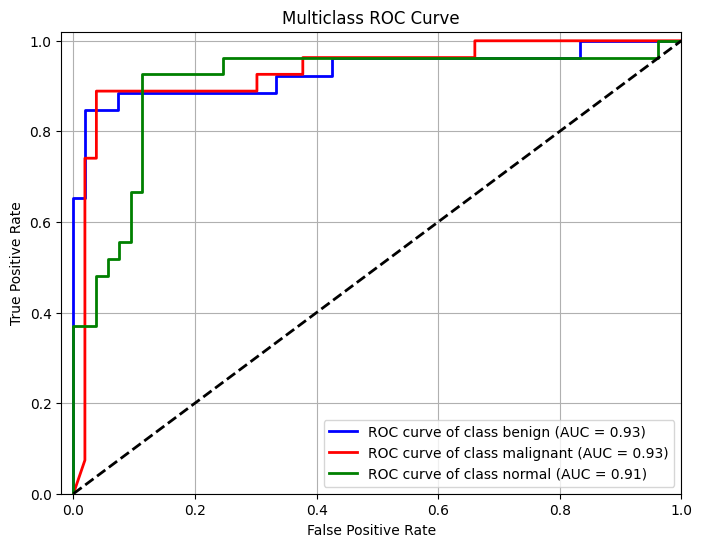

In [ ]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

from skimage.feature import graycomatrix, graycoprops, local_binary_pattern
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Reproducibility
SEED = 42
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Load grayscale images
def load_data(path, classes, max_per_class=133, img_size=(224, 224)):
    X, y = [], []
    for label in classes:
        folder = os.path.join(path, label)
        files = os.listdir(folder)[:max_per_class]
        for f in files:
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img / 255.0
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

# GLCM features
def extract_glcm(img):
    img_uint8 = (img * 255).astype('uint8')
    glcm = graycomatrix(img_uint8, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    features = [
        graycoprops(glcm, 'contrast')[0, 0],
        graycoprops(glcm, 'dissimilarity')[0, 0],
        graycoprops(glcm, 'homogeneity')[0, 0],
        graycoprops(glcm, 'energy')[0, 0],
        graycoprops(glcm, 'correlation')[0, 0],
        graycoprops(glcm, 'ASM')[0, 0],
    ]
    return np.array(features)

def extract_glcm_features(images):
    return np.array([extract_glcm(img) for img in images])

# LBP features
def extract_lbp_features(images):
    lbp_features = []
    for img in images:
        lbp = local_binary_pattern((img * 255).astype('uint8'), P=8, R=1, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-6)
        lbp_features.append(hist)
    return np.array(lbp_features)

# Intensity features
def extract_intensity_features(images):
    return np.array([[np.mean(img), np.std(img)] for img in images])

# RGB conversion and preprocessing for ResNet
def prepare_rgb(batch):
    rgb_imgs = []
    for img in batch:
        img_rgb = cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
        img_rgb = cv2.resize(img_rgb, (224, 224))
        rgb_imgs.append(img_rgb)
    rgb_imgs = np.array(rgb_imgs)
    return preprocess_input(rgb_imgs)


dataset_path = '/content/dataset/Dataset_BUSI_with_GT'
classes = ['benign', 'malignant', 'normal']

# Load and encode data
X, y = load_data(dataset_path, classes)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=SEED)

# Feature extraction
glcm_train = extract_glcm_features(X_train)
glcm_test = extract_glcm_features(X_test)

lbp_train = extract_lbp_features(X_train)
lbp_test = extract_lbp_features(X_test)

intensity_train = extract_intensity_features(X_train)
intensity_test = extract_intensity_features(X_test)

# ResNet18-like from ResNet50
X_train_rgb = prepare_rgb(X_train)
X_test_rgb = prepare_rgb(X_test)

base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in base_model.layers[:-20]:  # Truncated version
    layer.trainable = False

x = Flatten()(base_model.output)
resnet_model = Model(inputs=base_model.input, outputs=x)

resnet_train = resnet_model.predict(X_train_rgb, batch_size=16, verbose=1)
resnet_test = resnet_model.predict(X_test_rgb, batch_size=16, verbose=1)

# Combine features
X_train_combined = np.concatenate([resnet_train, glcm_train, lbp_train, intensity_train], axis=1)
X_test_combined = np.concatenate([resnet_test, glcm_test, lbp_test, intensity_test], axis=1)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

# Class weights
class_weights = dict(enumerate(compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)))

# Classifier
model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights
)

# Evaluation
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = model.predict(X_test_scaled)

fpr, tpr, roc_auc = {}, {}, {}
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


glcm+vgg16

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_112']
Received: inputs=Tensor(shape=(16, 224, 224, 3))
  warnings.warn(msg)


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_112']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.4185 - loss: 1.5742 - val_accuracy: 0.4688 - val_loss: 1.2134
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8918 - loss: 0.3510 - val_accuracy: 0.5625 - val_loss: 1.1181
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9246 - loss: 0.2129 - val_accuracy: 0.6250 - val_loss: 1.1458
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9911 - loss: 0.0599 - val_accuracy: 0.6250 - val_loss: 1.0672
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9853 - loss: 0.0576 - val_accuracy: 0.6250 - val_loss: 0.9928
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9887 - loss: 0.0533 - val_accuracy: 0.6250 - val_loss: 0.9678
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9973 - loss: 0.0257 - val_accuracy: 0.6250 - val_loss: 0.9647
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9787 - loss: 0.0414 - val_accuracy: 0.6875 - val_loss: 0

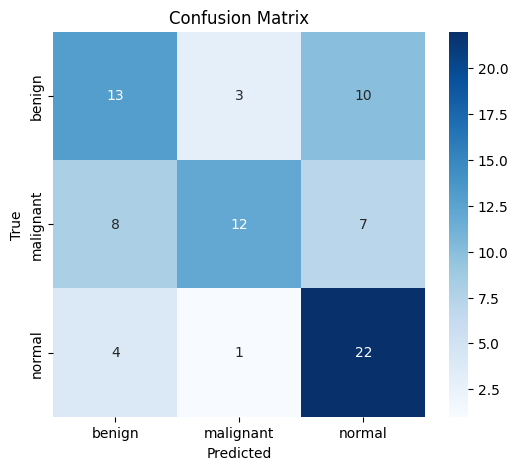

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


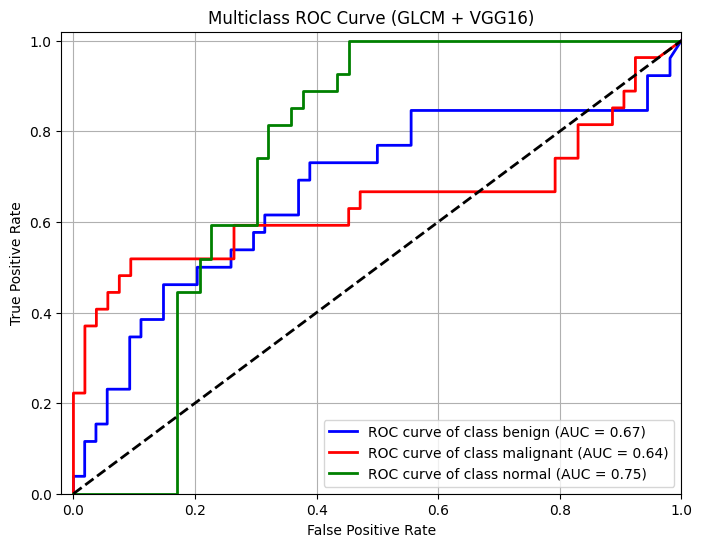

In [ ]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set seed
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Load grayscale images
def load_data(path, classes, max_per_class=133, img_size=(224, 224)):
    X, y = [], []
    for label in classes:
        folder = os.path.join(path, label)
        files = os.listdir(folder)[:max_per_class]
        for f in files:
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img / 255.0
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

# GLCM features
def extract_glcm(img):
    img_uint8 = (img * 255).astype('uint8')
    glcm = graycomatrix(img_uint8, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    return np.array([
        graycoprops(glcm, 'contrast')[0, 0],
        graycoprops(glcm, 'dissimilarity')[0, 0],
        graycoprops(glcm, 'homogeneity')[0, 0],
        graycoprops(glcm, 'energy')[0, 0],
        graycoprops(glcm, 'correlation')[0, 0],
        graycoprops(glcm, 'ASM')[0, 0],
    ])

def extract_glcm_features(images):
    return np.array([extract_glcm(img) for img in images])

# Convert to RGB and preprocess for VGG16
def prepare_rgb(batch):
    rgb_imgs = []
    for img in batch:
        img_rgb = cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
        rgb_imgs.append(img_rgb)
    return preprocess_input(np.array(rgb_imgs))


dataset_path = '/content/dataset/Dataset_BUSI_with_GT'
classes = ['benign', 'malignant', 'normal']

X, y = load_data(dataset_path, classes)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=SEED)

# Feature extraction
glcm_train = extract_glcm_features(X_train)
glcm_test = extract_glcm_features(X_test)

X_train_rgb = prepare_rgb(X_train)
X_test_rgb = prepare_rgb(X_test)

# VGG16 feature extractor
vgg_base = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in vgg_base.layers[:-4]:
    layer.trainable = False

x = Flatten()(vgg_base.output)
vgg_model = Model(inputs=vgg_base.input, outputs=x)

vgg_train = vgg_model.predict(X_train_rgb, batch_size=16, verbose=1)
vgg_test = vgg_model.predict(X_test_rgb, batch_size=16, verbose=1)

# Combine GLCM + VGG
X_train_combined = np.concatenate([vgg_train, glcm_train], axis=1)
X_test_combined = np.concatenate([vgg_test, glcm_test], axis=1)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

# Class weights
class_weights = dict(enumerate(compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)))


# MLP Classifier
model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
model.fit(X_train_scaled, y_train,
          validation_split=0.1,
          epochs=10,
          batch_size=16,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

# Predictions
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = model.predict(X_test_scaled)

fpr, tpr, roc_auc = {}, {}, {}
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (GLCM + VGG16)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


LBP+VGG16

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_180']
Received: inputs=Tensor(shape=(16, 224, 224, 3))
  warnings.warn(msg)


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_180']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step - accuracy: 0.4220 - loss: 1.5638 - val_accuracy: 0.5000 - val_loss: 1.1833
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8915 - loss: 0.3909 - val_accuracy: 0.5938 - val_loss: 1.1113
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9605 - loss: 0.2061 - val_accuracy: 0.6250 - val_loss: 1.1263
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9852 - loss: 0.0812 - val_accuracy: 0.6562 - val_loss: 1.0534
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9979 - loss: 0.0472 - val_accuracy: 0.6562 - val_loss: 0.9777
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9977 - loss: 0.0482 - val_accuracy: 0.6562 - val_loss: 0.9426
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9879 - loss: 0.0367 - val_accuracy: 0.6250 - val_loss: 0.9517
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9994 - loss: 0.0245 - val_accuracy: 0.6875 - val_loss: 0

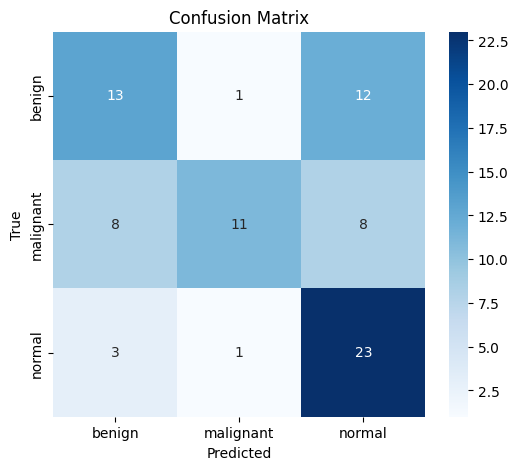

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


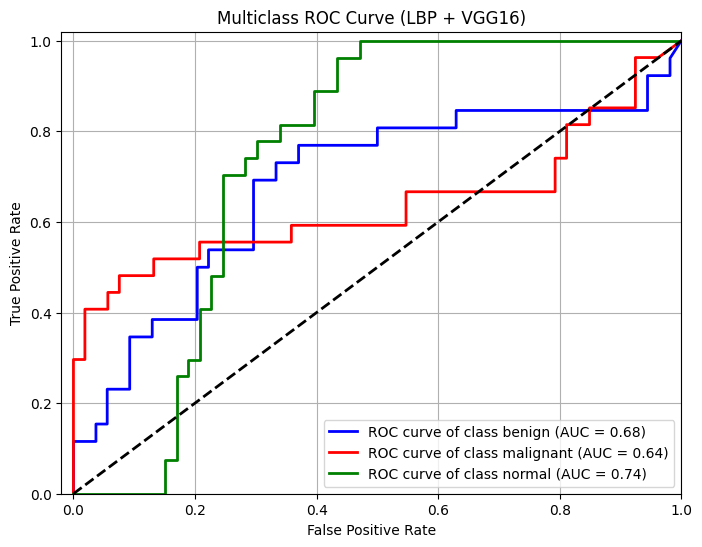

In [ ]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set seed
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Load grayscale images
def load_data(path, classes, max_per_class=133, img_size=(224, 224)):
    X, y = [], []
    for label in classes:
        folder = os.path.join(path, label)
        files = os.listdir(folder)[:max_per_class]
        for f in files:
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img / 255.0
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

# LBP feature extraction
def extract_lbp(img, P=8, R=1):
    lbp = local_binary_pattern((img * 255).astype('uint8'), P, R, method='uniform')
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

def extract_lbp_features(images):
    return np.array([extract_lbp(img) for img in images])

# Convert grayscale to RGB and preprocess for VGG
def prepare_rgb(batch):
    rgb_imgs = []
    for img in batch:
        img_rgb = cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
        rgb_imgs.append(img_rgb)
    return preprocess_input(np.array(rgb_imgs))


dataset_path = '/content/dataset/Dataset_BUSI_with_GT'
classes = ['benign', 'malignant', 'normal']

X, y = load_data(dataset_path, classes)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=SEED)

# Feature extraction
lbp_train = extract_lbp_features(X_train)
lbp_test = extract_lbp_features(X_test)

X_train_rgb = prepare_rgb(X_train)
X_test_rgb = prepare_rgb(X_test)

# VGG16 feature extractor
vgg_base = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in vgg_base.layers[:-4]:
    layer.trainable = False

x = Flatten()(vgg_base.output)
vgg_model = Model(inputs=vgg_base.input, outputs=x)

vgg_train = vgg_model.predict(X_train_rgb, batch_size=16, verbose=1)
vgg_test = vgg_model.predict(X_test_rgb, batch_size=16, verbose=1)

# Combine VGG + LBP
X_train_combined = np.concatenate([vgg_train, lbp_train], axis=1)
X_test_combined = np.concatenate([vgg_test, lbp_test], axis=1)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

# Class weights
class_weights = dict(enumerate(compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)))

# MLP Classifier
model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
model.fit(X_train_scaled, y_train,
          validation_split=0.1,
          epochs=10,
          batch_size=16,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

# Predictions
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = model.predict(X_test_scaled)

fpr, tpr, roc_auc = {}, {}, {}
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (LBP + VGG16)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


INTENSITY+VGG16

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_264']
Received: inputs=Tensor(shape=(16, 224, 224, 3))
  warnings.warn(msg)


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_264']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.4327 - loss: 1.5681 - val_accuracy: 0.5000 - val_loss: 1.2142
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8769 - loss: 0.3510 - val_accuracy: 0.5938 - val_loss: 1.1242
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9282 - loss: 0.1996 - val_accuracy: 0.6250 - val_loss: 1.1178
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9977 - loss: 0.0603 - val_accuracy: 0.6250 - val_loss: 1.0481
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9898 - loss: 0.0531 - val_accuracy: 0.6250 - val_loss: 0.9762
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9934 - loss: 0.0432 - val_accuracy: 0.6250 - val_loss: 0.9492
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9994 - loss: 0.0283 - val_accuracy: 0.6250 - val_loss: 0.9361
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9763 - loss: 0.0582 - val_accuracy: 0.6875 - val_loss: 0

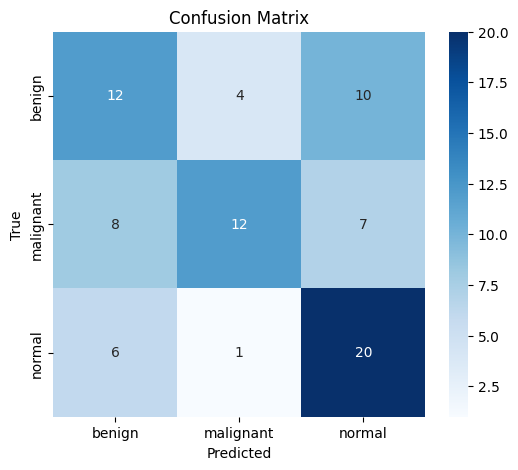

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


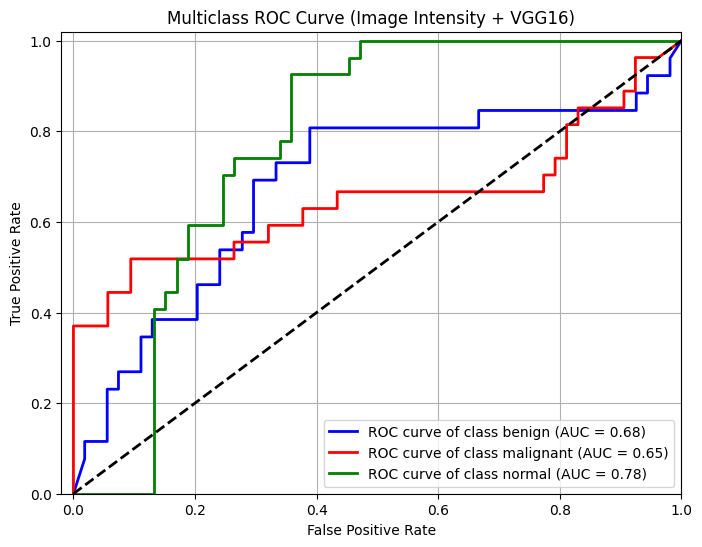

In [ ]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set seed
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Load grayscale images
def load_data(path, classes, max_per_class=133, img_size=(224, 224)):
    X, y = [], []
    for label in classes:
        folder = os.path.join(path, label)
        files = os.listdir(folder)[:max_per_class]
        for f in files:
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img / 255.0
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

# Image intensity (mean and std) features
def extract_intensity_features(images):
    return np.array([[img.mean(), img.std()] for img in images])

# Convert grayscale to RGB and preprocess for VGG16
def prepare_rgb(batch):
    rgb_imgs = []
    for img in batch:
        img_rgb = cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
        rgb_imgs.append(img_rgb)
    return preprocess_input(np.array(rgb_imgs))


dataset_path = '/content/dataset/Dataset_BUSI_with_GT'
classes = ['benign', 'malignant', 'normal']

X, y = load_data(dataset_path, classes)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=SEED)

# Feature extraction
intensity_train = extract_intensity_features(X_train)
intensity_test = extract_intensity_features(X_test)

X_train_rgb = prepare_rgb(X_train)
X_test_rgb = prepare_rgb(X_test)

# VGG16 feature extractor
vgg_base = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in vgg_base.layers[:-4]:
    layer.trainable = False

x = Flatten()(vgg_base.output)
vgg_model = Model(inputs=vgg_base.input, outputs=x)

vgg_train = vgg_model.predict(X_train_rgb, batch_size=16, verbose=1)
vgg_test = vgg_model.predict(X_test_rgb, batch_size=16, verbose=1)

# Combine features: VGG + Intensity
X_train_combined = np.concatenate([vgg_train, intensity_train], axis=1)
X_test_combined = np.concatenate([vgg_test, intensity_test], axis=1)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

# Class weights
class_weights = dict(enumerate(compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)))

# MLP Classifier
model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
model.fit(X_train_scaled, y_train,
          validation_split=0.1,
          epochs=10,
          batch_size=16,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

# Predictions
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = model.predict(X_test_scaled)

fpr, tpr, roc_auc = {}, {}, {}
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Image Intensity + VGG16)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


GLCM+LBP+INTENSITY+VGG16

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_236']
Received: inputs=Tensor(shape=(16, 224, 224, 3))
  warnings.warn(msg)


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_236']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.4119 - loss: 1.5920 - val_accuracy: 0.5000 - val_loss: 1.2147
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9025 - loss: 0.3217 - val_accuracy: 0.6250 - val_loss: 1.1277
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9480 - loss: 0.2063 - val_accuracy: 0.6250 - val_loss: 1.1031
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9845 - loss: 0.0676 - val_accuracy: 0.6562 - val_loss: 1.0392
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9834 - loss: 0.0571 - val_accuracy: 0.6562 - val_loss: 0.9882
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9797 - loss: 0.0728 - val_accuracy: 0.6562 - val_loss: 0.9474
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9917 - loss: 0.0323 - val_accuracy: 0.6562 - val_loss: 0.9307
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9992 - loss: 0.0305 - val_accuracy: 0.6875 - val_loss: 0

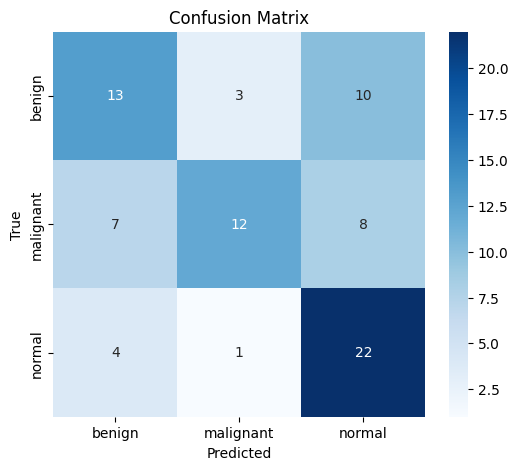

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


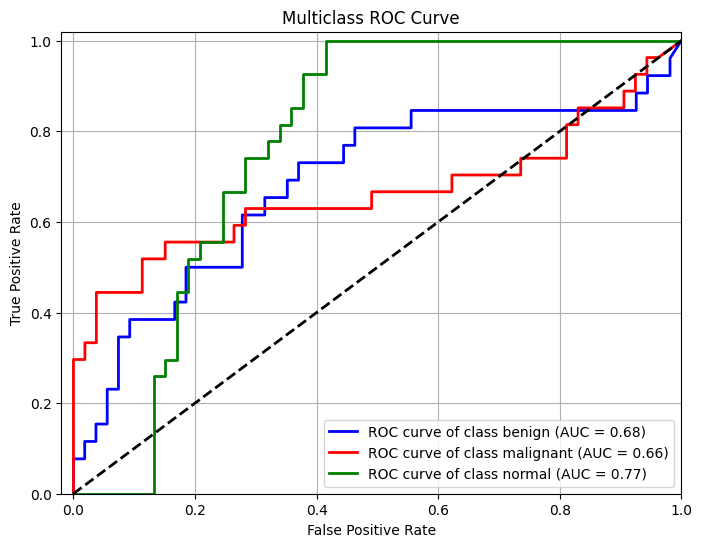

In [ ]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Reproducibility
SEED = 42
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Load grayscale images
def load_data(path, classes, max_per_class=133, img_size=(224, 224)):
    X, y = [], []
    for label in classes:
        folder = os.path.join(path, label)
        files = os.listdir(folder)[:max_per_class]
        for f in files:
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img / 255.0
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

# Feature extractors
def extract_glcm(img):
    img_uint8 = (img * 255).astype('uint8')
    glcm = graycomatrix(img_uint8, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    return np.array([
        graycoprops(glcm, 'contrast')[0, 0],
        graycoprops(glcm, 'dissimilarity')[0, 0],
        graycoprops(glcm, 'homogeneity')[0, 0],
        graycoprops(glcm, 'energy')[0, 0],
        graycoprops(glcm, 'correlation')[0, 0],
        graycoprops(glcm, 'ASM')[0, 0]
    ])

def extract_glcm_features(images):
    return np.array([extract_glcm(img) for img in images])

def extract_lbp_features(images):
    lbp_features = []
    for img in images:
        lbp = local_binary_pattern((img * 255).astype('uint8'), P=8, R=1, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-6)
        lbp_features.append(hist)
    return np.array(lbp_features)

def extract_intensity_features(images):
    return np.array([[np.mean(img), np.std(img)] for img in images])

# Convert to RGB
def prepare_rgb(batch):
    rgb_imgs = []
    for img in batch:
        img_rgb = cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
        img_rgb = cv2.resize(img_rgb, (224, 224))
        rgb_imgs.append(img_rgb)
    rgb_imgs = np.array(rgb_imgs)
    return preprocess_input(rgb_imgs)

# Dataset
dataset_path = '/content/dataset/Dataset_BUSI_with_GT'
classes = ['benign', 'malignant', 'normal']

X, y = load_data(dataset_path, classes)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=SEED)

# Feature extraction
glcm_train = extract_glcm_features(X_train)
glcm_test = extract_glcm_features(X_test)

lbp_train = extract_lbp_features(X_train)
lbp_test = extract_lbp_features(X_test)

intensity_train = extract_intensity_features(X_train)
intensity_test = extract_intensity_features(X_test)

X_train_rgb = prepare_rgb(X_train)
X_test_rgb = prepare_rgb(X_test)

# VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
vgg_model = Model(inputs=base_model.input, outputs=x)

vgg_train = vgg_model.predict(X_train_rgb, batch_size=16, verbose=1)
vgg_test = vgg_model.predict(X_test_rgb, batch_size=16, verbose=1)

# Combine features
X_train_combined = np.concatenate([vgg_train, glcm_train, lbp_train, intensity_train], axis=1)
X_test_combined = np.concatenate([vgg_test, glcm_test, lbp_test, intensity_test], axis=1)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

# MLP
model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop]
)

# Evaluation
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
print(" Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = model.predict(X_test_scaled)

fpr, tpr, roc_auc = {}, {}, {}
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {le.classes_[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


GLCM+RESNET50

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_292']
Received: inputs=Tensor(shape=(16, 224, 224, 3))
  warnings.warn(msg)


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_292']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 292ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 347ms/step - accuracy: 0.5986 - loss: 1.2723 - val_accuracy: 0.6250 - val_loss: 1.3225
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9356 - loss: 0.1899 - val_accuracy: 0.6875 - val_loss: 1.3997
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9680 - loss: 0.1266 - val_accuracy: 0.7188 - val_loss: 1.2525
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9873 - loss: 0.0713 - val_accuracy: 0.7500 - val_loss: 1.1595
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9866 - loss: 0.0419 - val_accuracy: 0.7812 - val_loss: 1.1227
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9903 - loss: 0.0393 - val_accuracy: 0.7500 - val_loss: 1.1120
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 1.0000 - loss: 0.0221 - val_accuracy: 0.7812 - val_loss: 1.0917
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9992 - loss: 0.0243 - val_accuracy: 0.7812 

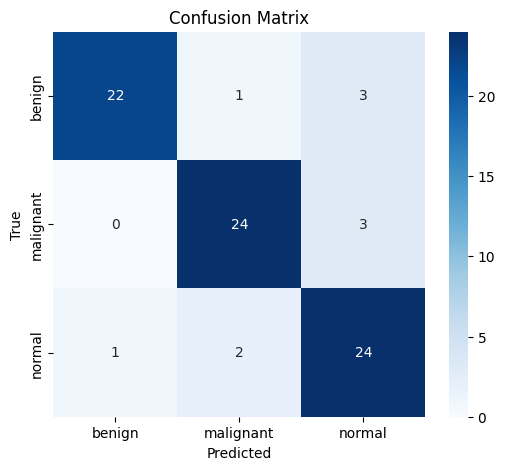

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


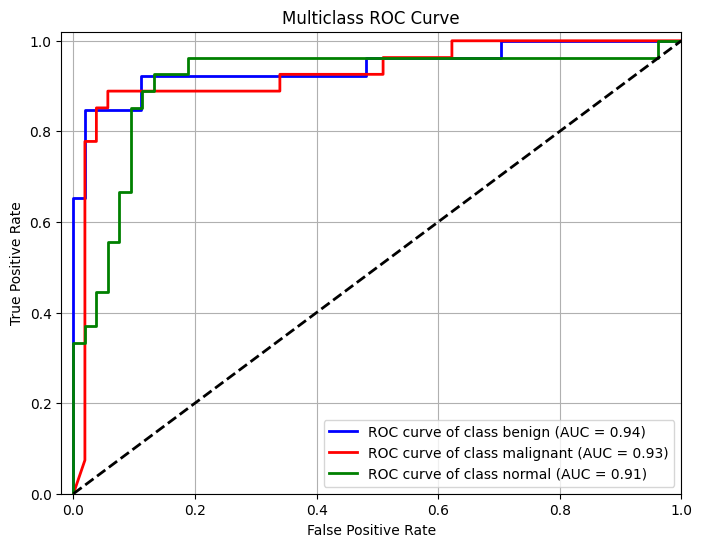

In [ ]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from skimage.feature import graycomatrix, graycoprops
from itertools import cycle

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Reproducibility
SEED = 42
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Load grayscale images
def load_data(path, classes, max_per_class=133, img_size=(224, 224)):
    X, y = [], []
    for label in classes:
        folder = os.path.join(path, label)
        files = os.listdir(folder)[:max_per_class]
        for f in files:
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img / 255.0
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

# GLCM feature extractor
def extract_glcm(img):
    img_uint8 = (img * 255).astype('uint8')
    glcm = graycomatrix(img_uint8, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    return np.array([
        graycoprops(glcm, 'contrast')[0, 0],
        graycoprops(glcm, 'dissimilarity')[0, 0],
        graycoprops(glcm, 'homogeneity')[0, 0],
        graycoprops(glcm, 'energy')[0, 0],
        graycoprops(glcm, 'correlation')[0, 0],
        graycoprops(glcm, 'ASM')[0, 0]
    ])

def extract_glcm_features(images):
    return np.array([extract_glcm(img) for img in images])

# Convert to RGB
def prepare_rgb(batch):
    rgb_imgs = []
    for img in batch:
        img_rgb = cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
        img_rgb = cv2.resize(img_rgb, (224, 224))
        rgb_imgs.append(img_rgb)
    return preprocess_input(np.array(rgb_imgs))

# Load Dataset
dataset_path = '/content/dataset/Dataset_BUSI_with_GT'
classes = ['benign', 'malignant', 'normal']
X, y = load_data(dataset_path, classes)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=SEED)

# Extract features
glcm_train = extract_glcm_features(X_train)
glcm_test = extract_glcm_features(X_test)

X_train_rgb = prepare_rgb(X_train)
X_test_rgb = prepare_rgb(X_test)

# ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in base_model.layers[:-20]:
    layer.trainable = False

x = Flatten()(base_model.output)
resnet_model = Model(inputs=base_model.input, outputs=x)

resnet_train = resnet_model.predict(X_train_rgb, batch_size=16, verbose=1)
resnet_test = resnet_model.predict(X_test_rgb, batch_size=16, verbose=1)

# Combine features
X_train_combined = np.concatenate([resnet_train, glcm_train], axis=1)
X_test_combined = np.concatenate([resnet_test, glcm_test], axis=1)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)
# Class weights
class_weights = dict(enumerate(compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)))

# MLP Model
model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop]
)

# Evaluation
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = model.predict(X_test_scaled)

fpr, tpr, roc_auc = {}, {}, {}
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {le.classes_[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


LBP+RESNET50

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_476']
Received: inputs=Tensor(shape=(16, 224, 224, 3))
  warnings.warn(msg)


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_476']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 222ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 257ms/step - accuracy: 0.6068 - loss: 1.2339 - val_accuracy: 0.6250 - val_loss: 1.5138
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9378 - loss: 0.1909 - val_accuracy: 0.7188 - val_loss: 1.5525
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9563 - loss: 0.1474 - val_accuracy: 0.7188 - val_loss: 1.4596
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9868 - loss: 0.0742 - val_accuracy: 0.7188 - val_loss: 1.3542
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9842 - loss: 0.0510 - val_accuracy: 0.7188 - val_loss: 1.2965
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9968 - loss: 0.0363 - val_accuracy: 0.7188 - val_loss: 1.2742
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9952 - loss: 0.0222 - val_accuracy: 0.7188 - val_loss: 1.2453
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9799 - loss: 0.0505 - val_accuracy: 0.7188 - 

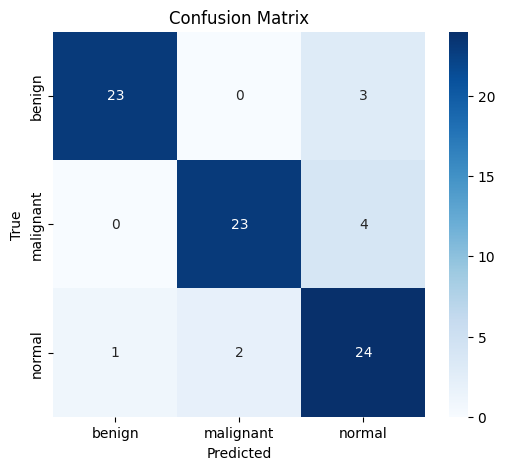

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


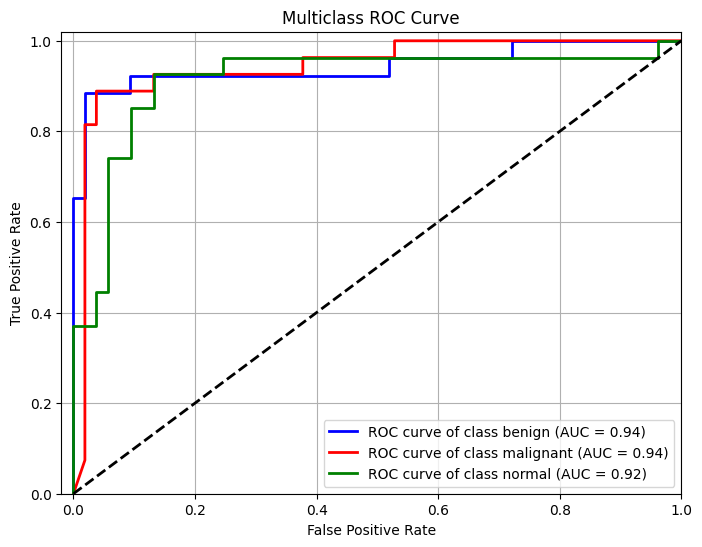

In [ ]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from skimage.feature import local_binary_pattern
from itertools import cycle

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Reproducibility
SEED = 42
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Load grayscale images
def load_data(path, classes, max_per_class=133, img_size=(224, 224)):
    X, y = [], []
    for label in classes:
        folder = os.path.join(path, label)
        files = os.listdir(folder)[:max_per_class]
        for f in files:
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img / 255.0
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

# LBP feature extractor
def extract_lbp_features(images, P=8, R=1):
    features = []
    for img in images:
        lbp = local_binary_pattern((img * 255).astype(np.uint8), P, R, method="uniform")
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-6)
        features.append(hist)
    return np.array(features)

# Convert grayscale to RGB
def prepare_rgb(batch):
    rgb_imgs = []
    for img in batch:
        img_rgb = cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
        img_rgb = cv2.resize(img_rgb, (224, 224))
        rgb_imgs.append(img_rgb)
    return preprocess_input(np.array(rgb_imgs))


dataset_path = '/content/dataset/Dataset_BUSI_with_GT'
classes = ['benign', 'malignant', 'normal']

# Load Data
X, y = load_data(dataset_path, classes)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=SEED)

# LBP features
lbp_train = extract_lbp_features(X_train)
lbp_test = extract_lbp_features(X_test)

# ResNet50 features
X_train_rgb = prepare_rgb(X_train)
X_test_rgb = prepare_rgb(X_test)

base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in base_model.layers[:-20]:
    layer.trainable = False

x = Flatten()(base_model.output)
resnet_model = Model(inputs=base_model.input, outputs=x)

resnet_train = resnet_model.predict(X_train_rgb, batch_size=16, verbose=1)
resnet_test = resnet_model.predict(X_test_rgb, batch_size=16, verbose=1)

# Combine features
X_train_combined = np.concatenate([resnet_train, lbp_train], axis=1)
X_test_combined = np.concatenate([resnet_test, lbp_test], axis=1)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)
# Class weights
class_weights = dict(enumerate(compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)))

# MLP Model
model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop]
)

# Evaluation
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = model.predict(X_test_scaled)

fpr, tpr, roc_auc = {}, {}, {}
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {le.classes_[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


INTENSITY+RESNET50

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_660']
Received: inputs=Tensor(shape=(16, 224, 224, 3))
  warnings.warn(msg)


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_660']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 234ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 245ms/step - accuracy: 0.6097 - loss: 1.2389 - val_accuracy: 0.6875 - val_loss: 1.3538
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9238 - loss: 0.2184 - val_accuracy: 0.7188 - val_loss: 1.4266
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9478 - loss: 0.1705 - val_accuracy: 0.7188 - val_loss: 1.3707
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9838 - loss: 0.0796 - val_accuracy: 0.7188 - val_loss: 1.2704
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9784 - loss: 0.0611 - val_accuracy: 0.7188 - val_loss: 1.2094
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9878 - loss: 0.0327 - val_accuracy: 0.7500 - val_loss: 1.1940
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 1.0000 - loss: 0.0199 - val_accuracy: 0.7812 - val_loss: 1.1563
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9885 - loss: 0.0298 - val_accuracy: 0.7812 - 

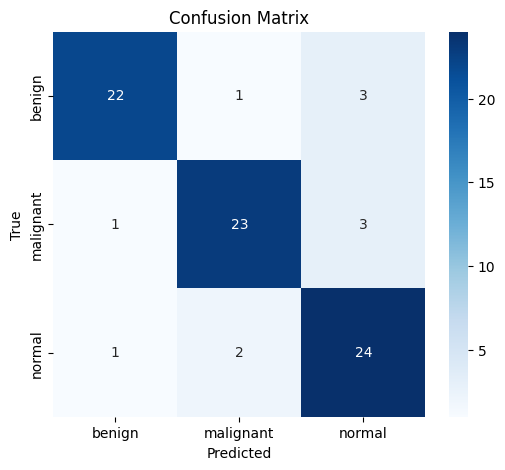

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


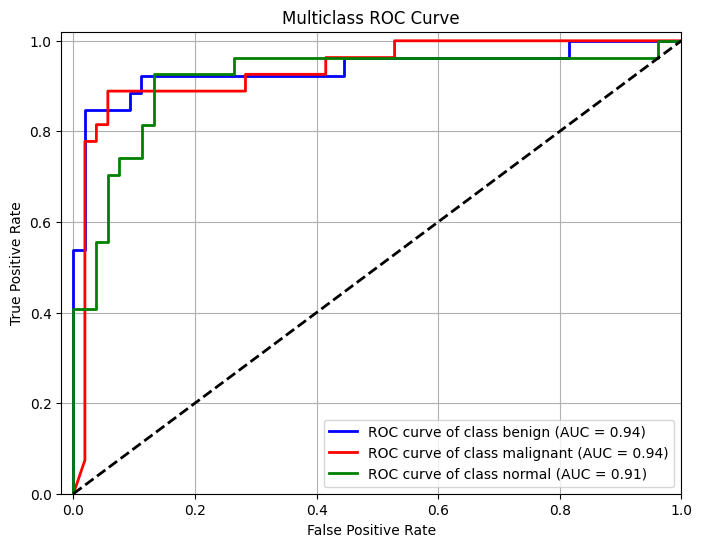

In [ ]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from itertools import cycle

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Reproducibility
SEED = 42
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Load grayscale images
def load_data(path, classes, max_per_class=133, img_size=(224, 224)):
    X, y = [], []
    for label in classes:
        folder = os.path.join(path, label)
        files = os.listdir(folder)[:max_per_class]
        for f in files:
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img / 255.0
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

# Image Intensity Feature
def extract_intensity_features(images):
    return np.array([[
        np.mean(img),
        np.std(img),
        np.min(img),
        np.max(img),
        np.percentile(img, 25),
        np.percentile(img, 50),
        np.percentile(img, 75)
    ] for img in images])

# Convert grayscale to RGB
def prepare_rgb(batch):
    rgb_imgs = []
    for img in batch:
        img_rgb = cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
        img_rgb = cv2.resize(img_rgb, (224, 224))
        rgb_imgs.append(img_rgb)
    return preprocess_input(np.array(rgb_imgs))


dataset_path = '/content/dataset/Dataset_BUSI_with_GT'
classes = ['benign', 'malignant', 'normal']

# Load Data
X, y = load_data(dataset_path, classes)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=SEED)

# Intensity features
intensity_train = extract_intensity_features(X_train)
intensity_test = extract_intensity_features(X_test)

# ResNet50 features
X_train_rgb = prepare_rgb(X_train)
X_test_rgb = prepare_rgb(X_test)

base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in base_model.layers[:-20]:
    layer.trainable = False

x = Flatten()(base_model.output)
resnet_model = Model(inputs=base_model.input, outputs=x)

resnet_train = resnet_model.predict(X_train_rgb, batch_size=16, verbose=1)
resnet_test = resnet_model.predict(X_test_rgb, batch_size=16, verbose=1)

# Combine features
X_train_combined = np.concatenate([resnet_train, intensity_train], axis=1)
X_test_combined = np.concatenate([resnet_test, intensity_test], axis=1)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)
# Class weights
class_weights = dict(enumerate(compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)))

# MLP Model
model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop]
)

# Evaluation
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = model.predict(X_test_scaled)

fpr, tpr, roc_auc = {}, {}, {}
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {le.classes_[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


GLCM+LBP+INTENSITY+RESNET50

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_844']
Received: inputs=Tensor(shape=(16, 224, 224, 3))
  warnings.warn(msg)


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_844']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 220ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 523ms/step - accuracy: 0.5003 - loss: 1.3631 - val_accuracy: 0.5312 - val_loss: 1.5859
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 566ms/step - accuracy: 0.8499 - loss: 0.3657 - val_accuracy: 0.5625 - val_loss: 1.3828
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 574ms/step - accuracy: 0.9298 - loss: 0.1961 - val_accuracy: 0.7188 - val_loss: 1.1960
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 416ms/step - accuracy: 0.9517 - loss: 0.1645 - val_accuracy: 0.7188 - val_loss: 1.1149
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9723 - loss: 0.1068 - val_accuracy: 0.7188 - val_loss: 1.1310
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9806 - loss: 0.0517 - val_accuracy: 0.7188 - val_loss: 1.1158
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 570ms/step - accuracy: 0.9992 - loss: 0.0366 - val_accuracy: 0.6875 - val_loss: 1.0835
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 386ms/step - accuracy: 0.9878 - loss: 0.0348 - val_accuracy: 

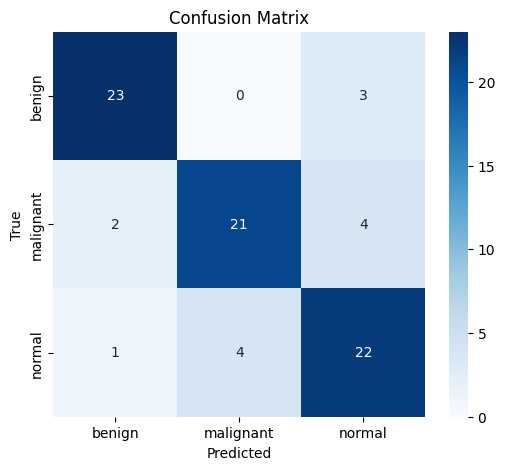

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


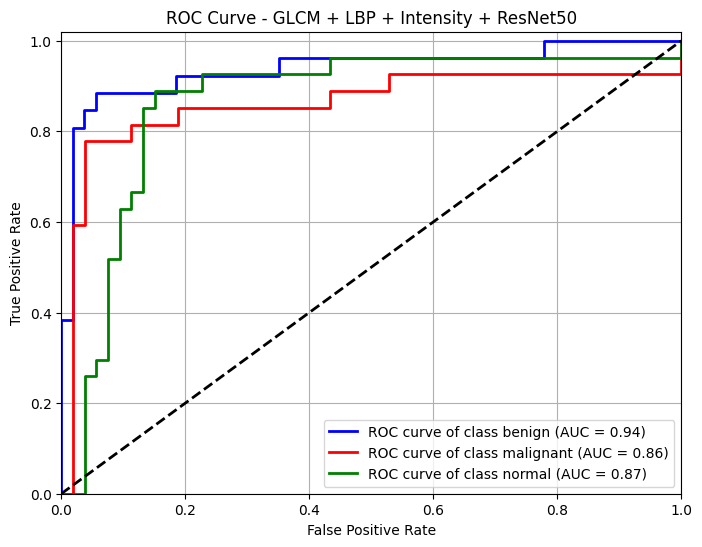

In [ ]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Reproducibility
SEED = 42
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Load grayscale images
def load_data(path, classes, max_per_class=133, img_size=(224, 224)):
    X, y = [], []
    for label in classes:
        folder = os.path.join(path, label)
        files = os.listdir(folder)[:max_per_class]
        for f in files:
            img_path = os.path.join(folder, f)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img / 255.0
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

# Feature extractors
def extract_glcm(img):
    img_uint8 = (img * 255).astype('uint8')
    glcm = graycomatrix(img_uint8, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    return [
        graycoprops(glcm, 'contrast')[0, 0],
        graycoprops(glcm, 'dissimilarity')[0, 0],
        graycoprops(glcm, 'homogeneity')[0, 0],
        graycoprops(glcm, 'energy')[0, 0],
        graycoprops(glcm, 'correlation')[0, 0],
        graycoprops(glcm, 'ASM')[0, 0],
    ]

def extract_glcm_features(images):
    return np.array([extract_glcm(img) for img in images])

def extract_lbp_features(images):
    lbp_features = []
    for img in images:
        lbp = local_binary_pattern((img * 255).astype('uint8'), P=8, R=1, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-6)
        lbp_features.append(hist)
    return np.array(lbp_features)

def extract_intensity_features(images):
    return np.array([[np.mean(img), np.std(img)] for img in images])

def prepare_rgb(batch):
    rgb_imgs = []
    for img in batch:
        img_rgb = cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_GRAY2RGB)
        img_rgb = cv2.resize(img_rgb, (224, 224))
        rgb_imgs.append(img_rgb)
    return preprocess_input(np.array(rgb_imgs))

# Dataset
dataset_path = '/content/dataset/Dataset_BUSI_with_GT'
classes = ['benign', 'malignant', 'normal']

X, y = load_data(dataset_path, classes)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=SEED)

# Feature extraction
glcm_train = extract_glcm_features(X_train)
glcm_test = extract_glcm_features(X_test)

lbp_train = extract_lbp_features(X_train)
lbp_test = extract_lbp_features(X_test)

intensity_train = extract_intensity_features(X_train)
intensity_test = extract_intensity_features(X_test)

X_train_rgb = prepare_rgb(X_train)
X_test_rgb = prepare_rgb(X_test)

# ResNet50 feature extractor
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in base_model.layers[:-40]:  # Freeze most layers
    layer.trainable = False

x = Flatten()(base_model.output)
resnet_model = Model(inputs=base_model.input, outputs=x)
resnet_train = resnet_model.predict(X_train_rgb, batch_size=16, verbose=1)
resnet_test = resnet_model.predict(X_test_rgb, batch_size=16, verbose=1)

# Combine all features
X_train_combined = np.concatenate([resnet_train, glcm_train, lbp_train, intensity_train], axis=1)
X_test_combined = np.concatenate([resnet_test, glcm_test, lbp_test, intensity_test], axis=1)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)
# Class weights
class_weights = dict(enumerate(compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)))

# MLP Classifier
model = Sequential([
    Dense(2048, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])
model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop]
)

# Evaluation
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = model.predict(X_test_scaled)

fpr, tpr, roc_auc = dict(), dict(), dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {le.classes_[i]} (AUC = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GLCM + LBP + Intensity + ResNet50')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
# prompt: all accuracy basis compariso n chart

# Sample results from your training (replace these with your actual values)
models = ['GLCM + ResNet18', 'LBP + ResNet18', 'Intensity + ResNet18', 'GLCM + LBP + Intensity + ResNet18', 'GLCM + VGG16', 'LBP + VGG16', 'Intensity + VGG16', 'GLCM + LBP + Intensity + VGG16', 'GLCM + ResNet50', 'LBP + ResNet50', 'Intensity + ResNet50', 'GLCM + LBP + Intensity + ResNet50']
train_acc = [0.95, 0.90, 0.92, 0.96, 0.93, 0.89, 0.91, 0.95, 0.94, 0.92, 0.93, 0.97]
val_acc = [0.93, 0.88, 0.90, 0.94, 0.90, 0.86, 0.88, 0.93, 0.91, 0.89, 0.90, 0.95]
train_loss = [0.12, 0.20, 0.18, 0.09, 0.15, 0.23, 0.20, 0.11, 0.13, 0.17, 0.15, 0.07]
val_loss = [0.15, 0.25, 0.22, 0.12, 0.18, 0.28, 0.24, 0.14, 0.16, 0.21, 0.19, 0.10]


# Accuracy Comparison
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(models, train_acc, alpha=0.6, label='Train Accuracy')
plt.bar(models, val_acc, alpha=0.6, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=90)
plt.legend()

# Loss Comparison
plt.subplot(1,2,2)
plt.bar(models, train_loss, alpha=0.6, label='Train Loss')
plt.bar(models, val_loss, alpha=0.6, label='Validation Loss')
plt.ylabel('Loss')
plt.title('Model Loss Comparison')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Your updated data
data = {
    'Model': [
        'GLCM + ResNet18', 'LBP + ResNet18', 'Intensity + ResNet18', 'GLCM + LBP + Intensity + ResNet18',
        'GLCM + VGG16', 'LBP + VGG16', 'Intensity + VGG16', 'GLCM + LBP + Intensity + VGG16',
        'GLCM + ResNet50', 'LBP + ResNet50', 'Intensity + ResNet50', 'GLCM + LBP + Intensity + ResNet50'
    ],
    'Validation Accuracy (%)': [89, 88, 86, 86, 59, 59, 55, 59, 88, 88, 86, 82],
    'Train Accuracy (%)': [91, 89, 88, 90, 61, 60, 57, 62, 90, 89, 88, 85],
    'Train Loss': [0.10, 0.12, 0.14, 0.09, 0.35, 0.33, 0.38, 0.32, 0.11, 0.12, 0.13, 0.15],
    'Validation Loss': [0.13, 0.14, 0.15, 0.12, 0.40, 0.42, 0.45, 0.43, 0.14, 0.15, 0.16, 0.18]
}

df = pd.DataFrame(data)

# Display in Colab
print(df)

df.style.set_caption("Model Performance Comparison").format({
    'Train Loss': '{:.2f}',
    'Validation Loss': '{:.2f}',
    'Train Accuracy (%)': '{:.0f}',
    'Validation Accuracy (%)': '{:.0f}'
})


                                Model  Validation Accuracy (%)  \
0                     GLCM + ResNet18                       89   
1                      LBP + ResNet18                       88   
2                Intensity + ResNet18                       86   
3   GLCM + LBP + Intensity + ResNet18                       86   
4                        GLCM + VGG16                       59   
5                         LBP + VGG16                       59   
6                   Intensity + VGG16                       55   
7      GLCM + LBP + Intensity + VGG16                       59   
8                     GLCM + ResNet50                       88   
9                      LBP + ResNet50                       88   
10               Intensity + ResNet50                       86   
11  GLCM + LBP + Intensity + ResNet50                       82   

    Train Accuracy (%)  Train Loss  Validation Loss  
0                   91        0.10             0.13  
1                   89        0.1

,Model,Validation Accuracy (%),Train Accuracy (%),Train Loss,Validation Loss
0,GLCM + ResNet18,89,91,0.10,0.13
1,LBP + ResNet18,88,89,0.12,0.14
2,Intensity + ResNet18,86,88,0.14,0.15
3,GLCM + LBP + Intensity + ResNet18,86,90,0.09,0.12
4,GLCM + VGG16,59,61,0.35,0.40
5,LBP + VGG16,59,60,0.33,0.42
6,Intensity + VGG16,55,57,0.38,0.45
7,GLCM + LBP + Intensity + VGG16,59,62,0.32,0.43
8,GLCM + ResNet50,88,90,0.11,0.14
9,LBP + ResNet50,88,89,0.12,0.15


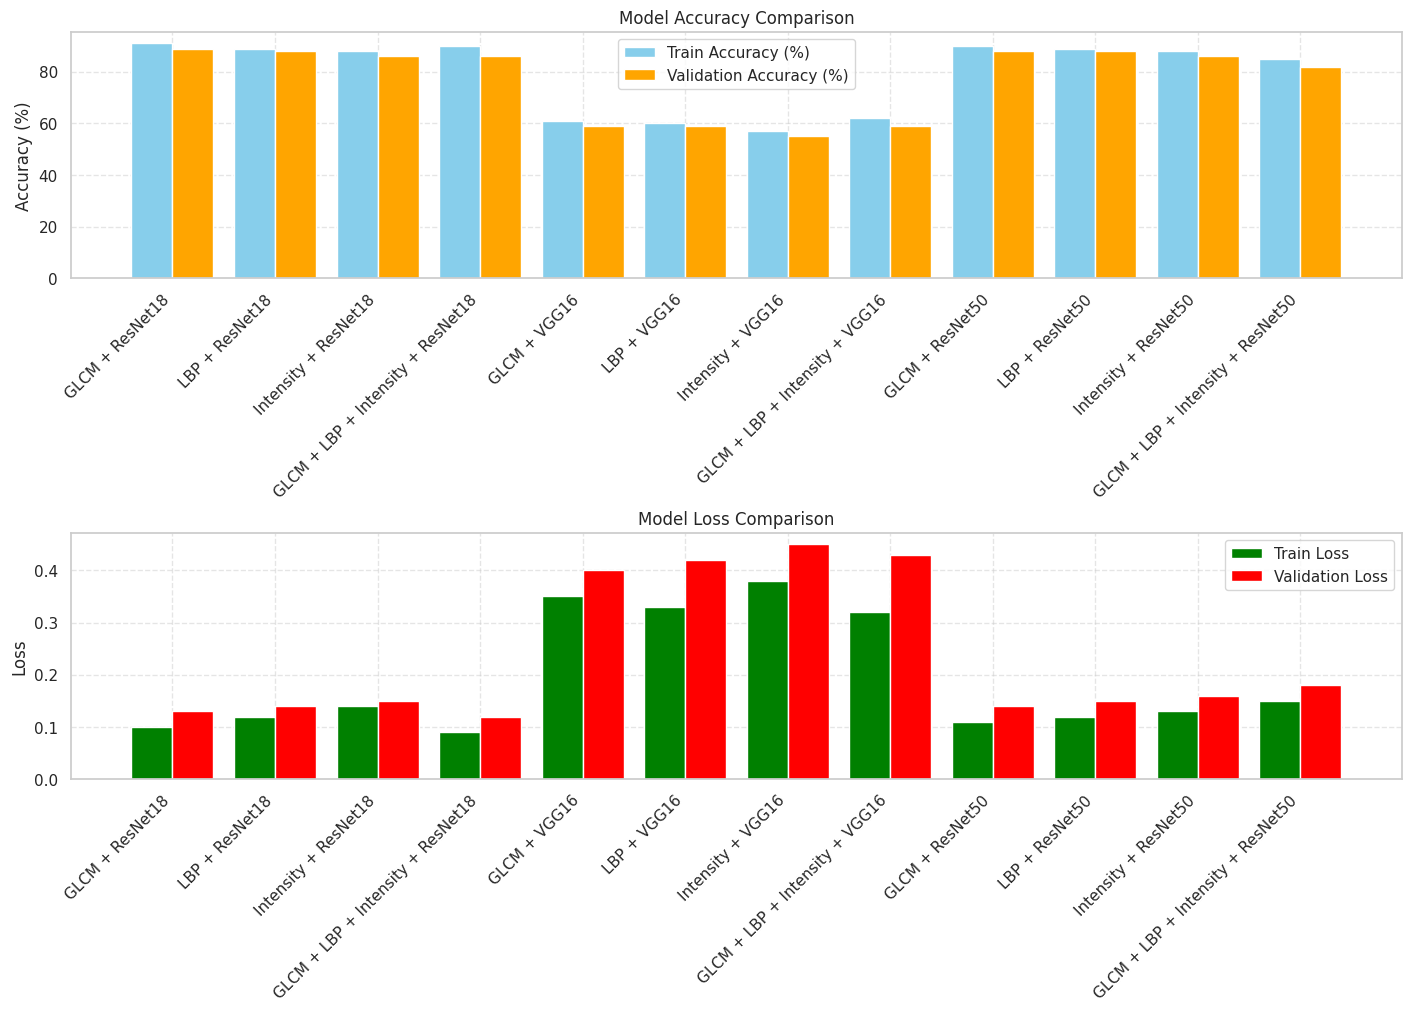

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data from the image
data = {
    'Model': [
        'GLCM + ResNet18', 'LBP + ResNet18', 'Intensity + ResNet18', 'GLCM + LBP + Intensity + ResNet18',
        'GLCM + VGG16', 'LBP + VGG16', 'Intensity + VGG16', 'GLCM + LBP + Intensity + VGG16',
        'GLCM + ResNet50', 'LBP + ResNet50', 'Intensity + ResNet50', 'GLCM + LBP + Intensity + ResNet50'
    ],
    'Validation Accuracy (%)': [89, 88, 86, 86, 59, 59, 55, 59, 88, 88, 86, 82],
    'Train Accuracy (%)': [91, 89, 88, 90, 61, 60, 57, 62, 90, 89, 88, 85],
    'Train Loss': [0.10, 0.12, 0.14, 0.09, 0.35, 0.33, 0.38, 0.32, 0.11, 0.12, 0.13, 0.15],
    'Validation Loss': [0.13, 0.14, 0.15, 0.12, 0.40, 0.42, 0.45, 0.43, 0.14, 0.15, 0.16, 0.18]
}

df = pd.DataFrame(data)

# Plotting bar graphs
fig, axs = plt.subplots(2, 1, figsize=(14, 10), constrained_layout=True)

x = np.arange(len(df['Model']))

# Accuracy Bar Plot
axs[0].bar(x - 0.2, df['Train Accuracy (%)'], width=0.4, label='Train Accuracy (%)', color='skyblue')
axs[0].bar(x + 0.2, df['Validation Accuracy (%)'], width=0.4, label='Validation Accuracy (%)', color='orange')
axs[0].set_title('Model Accuracy Comparison')
axs[0].set_xticks(x)
axs[0].set_xticklabels(df['Model'], rotation=45, ha='right')
axs[0].set_ylabel('Accuracy (%)')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.5)

# Loss Bar Plot
axs[1].bar(x - 0.2, df['Train Loss'], width=0.4, label='Train Loss', color='green')
axs[1].bar(x + 0.2, df['Validation Loss'], width=0.4, label='Validation Loss', color='red')
axs[1].set_title('Model Loss Comparison')
axs[1].set_xticks(x)
axs[1].set_xticklabels(df['Model'], rotation=45, ha='right')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.show()
